# GRIP @The Sparks Foundation Internship

## Data Science and Business Analytics Intern

## Name : Pratiksha Sanas
### Task 6 : Prediction using Decision Tree Algorithm
In this task, I will be creating a decision tree classifier on the Iris Data to predict the right class when we feed new data to this classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import 

In [4]:
data= pd.read_csv(r"C:\Data sciences all Important file\GRIP Spark\Task-2\Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# data analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Remove variable**


In [10]:
data=data.drop(["Id"],axis=1)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Data Visualization

* Identify and Treatment of Outliers

<AxesSubplot:>

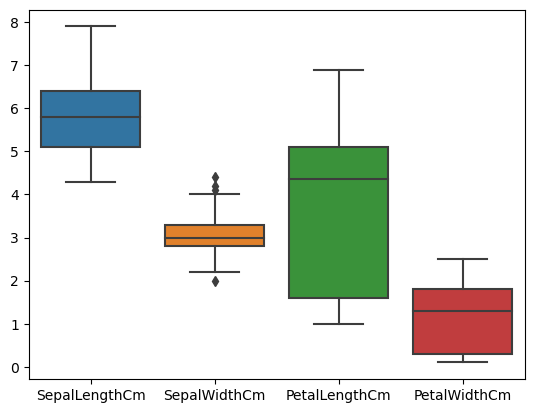

In [16]:
sns.boxplot(data=data)

* Removing Outliers by Winsorizing technique

In [26]:
q1= data ['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)

iqr = q3- q1 
Low_limit = q1-q3*iqr

upper_limit = q3+q1*iqr


In [32]:
column_value= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
column_value

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [38]:
for column in column_value:
    q1= data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr= q3-q1
    low_limit = q1-1.5*iqr
    upper_limit= q3+1.5*iqr
    for values in data[column]:
        if values > upper_limit:
            data[column] = np.where(data[column]> upper_limit , upper_limit,data[column])
        else:
            data[column]=np.where(data[column]<low_limit,low_limit,data[column])

<AxesSubplot:>

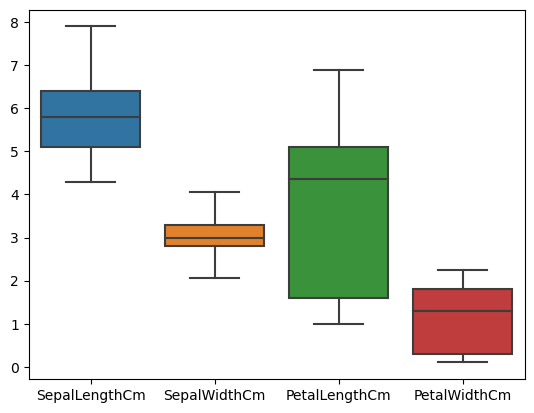

In [39]:
sns.boxplot(data=data)

# Encoding Categorical Data

In [40]:
from sklearn.preprocessing import LabelEncoder

data[['Species']]=data[['Species']].apply(LabelEncoder().fit_transform)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Partition

In [41]:
from sklearn.model_selection import train_test_split

x = data.drop(['Species'],axis=1)
y= data['Species']

x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.3 ,random_state=100)

# Decision Tree Model Building

In [42]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

# apply model
classifier = DecisionTreeClassifier()
output= classifier.fit(x_train, y_train)

In [43]:
independent_variable = list(data.columns[0:4])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

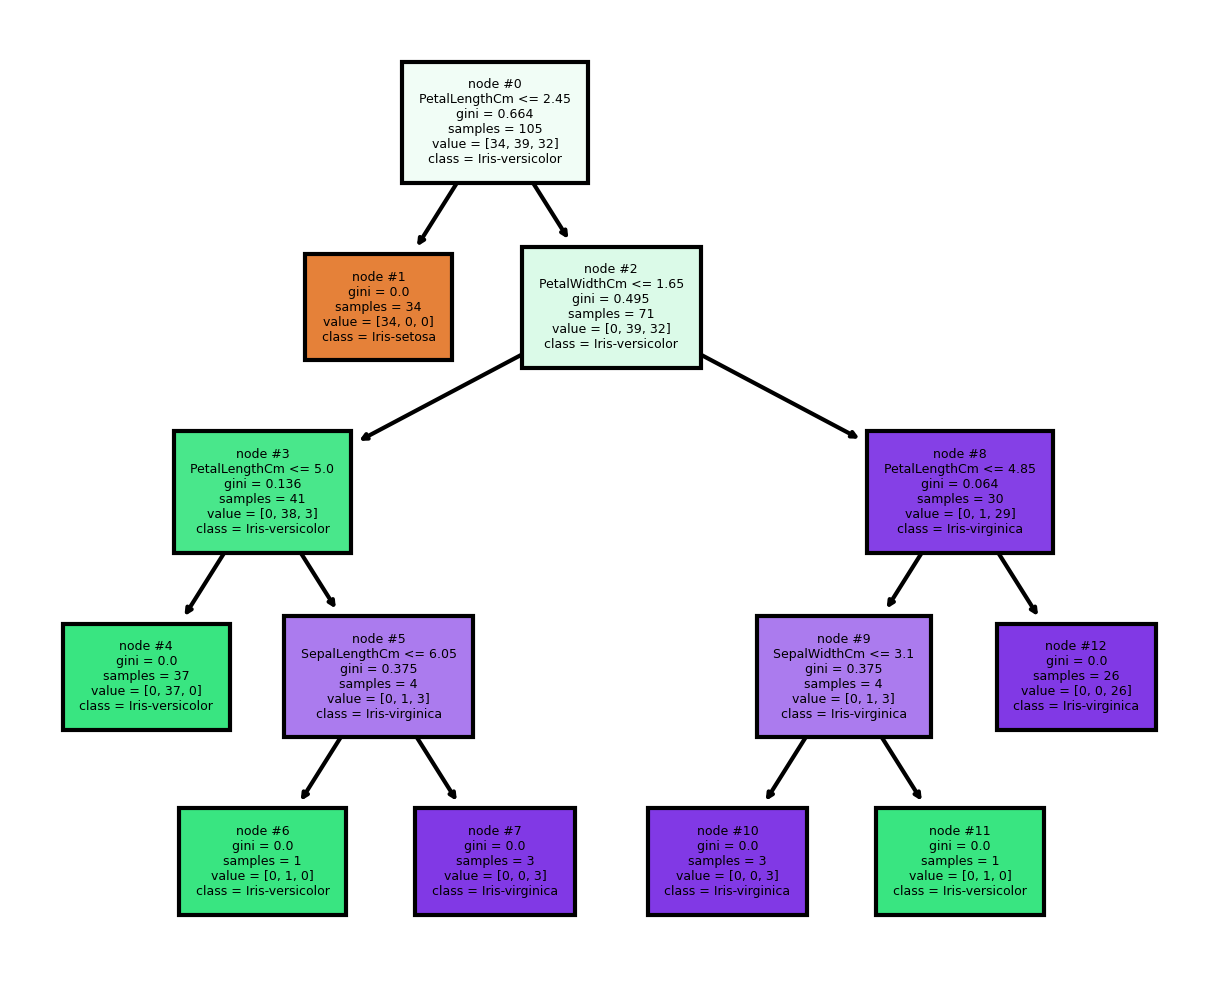

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt

species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(output,  # Model 
               feature_names = independent_variable,  # column name
               class_names=species,
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3);